# BellaBeat Capstone Project

### Bellabeat is a pioneering high-tech company creating health-focused products for women. Their smart devices seamlessly integrate into women's lives, offering insights into activity, sleep, stress, and reproductive health. With an elegant design and innovative technology, Bellabeat empowers women to monitor and understand their health, enabling informed decisions for a healthier lifestyle.

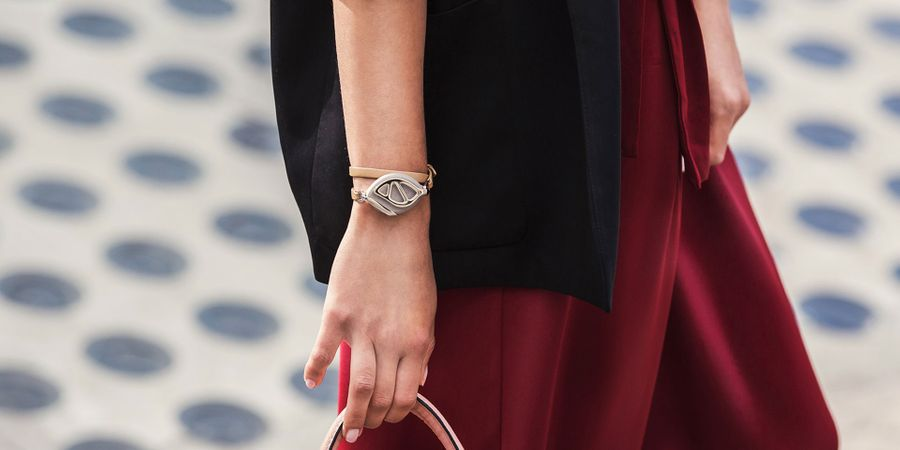

# I. Ask
## 1.Business Task 

- To use exisiting data to get insights into how customers use smart devices and provide recommendations for the marketing strategy 

## 2. Who are the key stakeholders?
- Urška Sršen - Bellabeat’s Cofounder & Chief Creative Officer 
- Sando Mur: Mathematician and Bellabeat’s cofounder
- Bellabeat marketing analytics team.

# II.Prepare
## 1. Where is the data stored?

The data is stored online on Kaggle uploaded by MÖBIUS

## 2. Dataset

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

## 3. Credibility of the dataset (Using ROCCC analysis)

- Reliable - Not reliable -  30 entries do not adequately represent the population to study
- Original - Not Orignial - Third party source ( Amazon Mechanical Turk)
- Comprehensive - Although the data provides information on physical activity , heart rate, sleep etc. The sample size considered for the data is very small. 
- Current - Not current - The data is outdated as it is from the year 2016.
- Cited - Not cited - Data collected comes from a third party.

# III. Process

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing datasets

In [2]:
daily_activity = pd.read_csv(r"C:\Users\chris\Downloads\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")
sleep = pd.read_csv(r"C:\Users\chris\Downloads\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")
heartrate = pd.read_csv(r"C:\Users\chris\Downloads\Fitabase Data 4.12.16-5.12.16\heartrate_seconds_merged.csv")
weight = pd.read_csv(r"C:\Users\chris\Downloads\Fitabase Data 4.12.16-5.12.16\weightLogInfo_merged.csv")
hourly_steps=pd.read_csv(r"C:\Users\chris\Downloads\Fitabase Data 4.12.16-5.12.16\hourlySteps_merged.csv")
hourly_calories=pd.read_csv(r"C:\Users\chris\Downloads\Fitabase Data 4.12.16-5.12.16\hourlyCalories_merged.csv")

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [6]:
heartrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [7]:
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [8]:
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


## Data Cleaning

In [9]:
# Date columns for all the datasets need to be converted to datetime format

In [10]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
heartrate['Time'] = pd.to_datetime(heartrate['Time'])
weight['Date'] = pd.to_datetime(weight['Date'])

In [11]:
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
hourly_calories['ActivityHour']= pd.to_datetime(hourly_calories['ActivityHour'])

In [12]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [13]:
# Extracting Day ,Month and Year from Activity Date column

In [14]:
daily_activity['Year'] = daily_activity['ActivityDate'].dt.year

In [15]:
daily_activity['Month'] = daily_activity['ActivityDate'].dt.month

In [16]:
daily_activity['Day'] = daily_activity['ActivityDate'].dt.day_name()

In [17]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Year,Month,Day
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,2016,4,Tuesday
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2016,4,Wednesday
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,2016,4,Thursday
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,2016,4,Friday
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2016,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,2016,5,Sunday
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,2016,5,Monday
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,2016,5,Tuesday
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,2016,5,Wednesday


## Checking for duplicates

In [18]:
daily_activity.duplicated().any()

False

In [19]:
sleep.duplicated().any()

True

In [20]:
heartrate.duplicated().any()

False

In [21]:
# Dropping duplicates

In [22]:
sleep.drop_duplicates(inplace=True)

In [23]:
daily_activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Year', 'Month',
       'Day'],
      dtype='object')

In [24]:
# Creating a total active minutes column

In [25]:
daily_activity['TotalActiveMinutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes'] 

In [26]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Year,Month,Day,TotalActiveMinutes
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,2016,4,Tuesday,366
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2016,4,Wednesday,257
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,2016,4,Thursday,222
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,2016,4,Friday,272
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2016,4,Saturday,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,2016,5,Sunday,266
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,2016,5,Monday,309
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,2016,5,Tuesday,253
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,2016,5,Wednesday,313


In [27]:
# Merging hourly_steps and hourly_calories dataset

In [28]:
hourly_merged = pd.merge(hourly_steps, hourly_calories, on=['ActivityHour', 'Id'])
hourly_merged.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


In [29]:
# Renaming activity hour column

In [30]:
hourly_merged.rename(columns={'ActivityHour':'Date'},inplace=True)

In [31]:
# Extracting Hour from Activity Hour column

In [32]:
hourly_merged['Hour'] = hourly_merged['Date'].dt.hour

In [33]:
hourly_merged.head()

,Id,Date,StepTotal,Calories,Hour
0,1503960366,2016-04-12 00:00:00,373,81,0
1,1503960366,2016-04-12 01:00:00,160,61,1
2,1503960366,2016-04-12 02:00:00,151,59,2
3,1503960366,2016-04-12 03:00:00,0,47,3
4,1503960366,2016-04-12 04:00:00,0,48,4


In [34]:
# Merging daily_activity and sleep dataset

In [35]:
data = pd.merge(daily_activity, sleep, on="Id", how="left")
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories,Year,Month,Day,TotalActiveMinutes,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,728,1985,2016,4,Tuesday,366,4/12/2016 12:00:00 AM,1.0,327.0,346.0
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,728,1985,2016,4,Tuesday,366,4/13/2016 12:00:00 AM,2.0,384.0,407.0
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,728,1985,2016,4,Tuesday,366,4/15/2016 12:00:00 AM,1.0,412.0,442.0
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,728,1985,2016,4,Tuesday,366,4/16/2016 12:00:00 AM,2.0,340.0,367.0
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,728,1985,2016,4,Tuesday,366,4/17/2016 12:00:00 AM,1.0,700.0,712.0


In [85]:
data['TotalHoursAsleep'] = data['TotalMinutesAsleep']/60

In [86]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,Year,Month,Day,TotalActiveMinutes,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,1985,2016,4,Tuesday,366,4/12/2016 12:00:00 AM,1.0,327.0,346.0,5.450000
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,1985,2016,4,Tuesday,366,4/13/2016 12:00:00 AM,2.0,384.0,407.0,6.400000
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,1985,2016,4,Tuesday,366,4/15/2016 12:00:00 AM,1.0,412.0,442.0,6.866667
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,1985,2016,4,Tuesday,366,4/16/2016 12:00:00 AM,2.0,340.0,367.0,5.666667
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,...,1985,2016,4,Tuesday,366,4/17/2016 12:00:00 AM,1.0,700.0,712.0,11.666667


# IV. Analyze

In [38]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Year,Month,TotalActiveMinutes
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.0,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,2016.0,4.350000,227.542553
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,0.0,0.477224,121.776307
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,4.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,2016.0,4.000000,146.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,2016.0,4.000000,247.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,2016.0,5.000000,317.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,2016.0,5.000000,552.000000


## Based on the dataframe:
#### - The average number of steps taken is 7,638, which is approximately equivalent to a distance of 5.5 kilometers
#### - On average, users burn around 2,304 calories. 
#### - Users are active for an average of 227 minutes, while they remain sedentary for approximately 991 minutes.

In [39]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927
std,2.060863e+09,0.346636,118.635918,127.455140
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.750000
50%,4.702922e+09,1.000000,432.500000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


#### - Users spend an average of 419 minutes asleep, with approximately 458 minutes spent in bed.

# V. Share

In [40]:
data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Year', 'Month',
       'Day', 'TotalActiveMinutes', 'SleepDay', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')

## Calories burnt per day

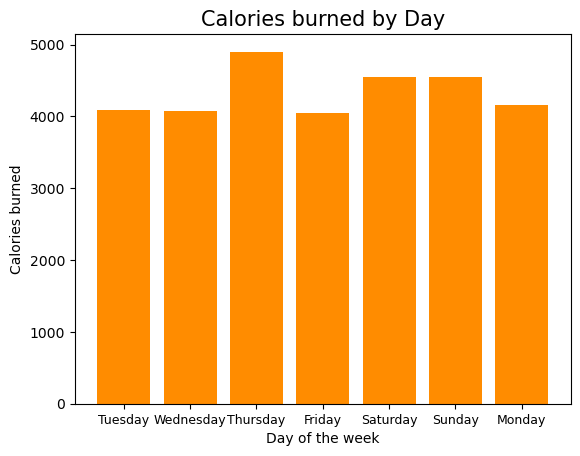

In [41]:
plt.bar('Day','Calories',data=daily_activity,color='darkorange')
plt.title('Calories burned by Day',fontsize=15)
plt.xlabel('Day of the week')
plt.ylabel('Calories burned')
plt.xticks(fontsize=9)
plt.show()

#### From the bar graph we can observe that Thursday is the day calories are burnt the most while the least calories were burnt on Friday

## Total steps per day

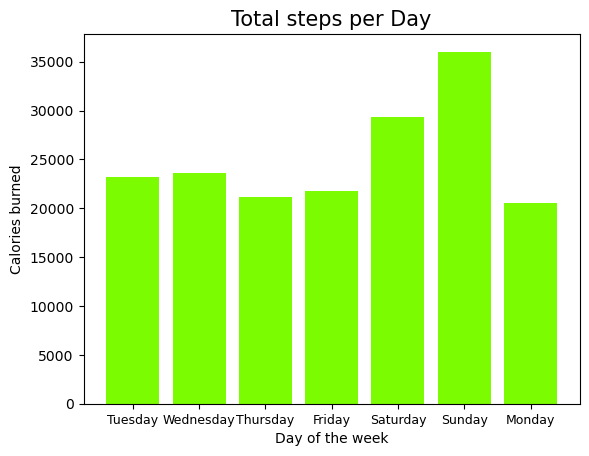

In [42]:
plt.bar('Day','TotalSteps',data=daily_activity,color='lawngreen')
plt.title('Total steps per Day',fontsize=15)
plt.xlabel('Day of the week')
plt.ylabel('Calories burned')
plt.xticks(fontsize=9)
plt.show()

#### The bar graph indicates that Sunday and Saturday exhibit higher step counts compared to the other days, suggesting that this data likely represents the working class population. The step counts on the remaining days are relatively lower.

### Total Hours Asleep per day

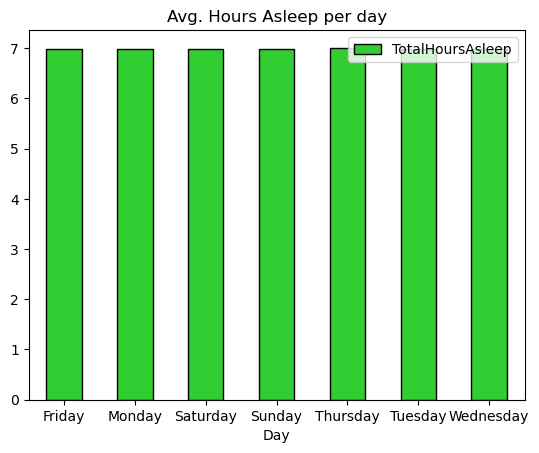

In [100]:
mins_sleep = pd.pivot_table(data=data,index='Day',values=['TotalHoursAsleep'],aggfunc='mean')
mins_sleep.plot(kind='bar',color='limegreen',edgecolor='black')
plt.title('Avg. Hours Asleep per day')
plt.xticks(rotation=0)
plt.legend()
plt.show()

#### According to the bar graph, Thursday is the day with the highest sleep duration, while rest of the days are constant at 6.9hrs

## Highest number of logins or user activity

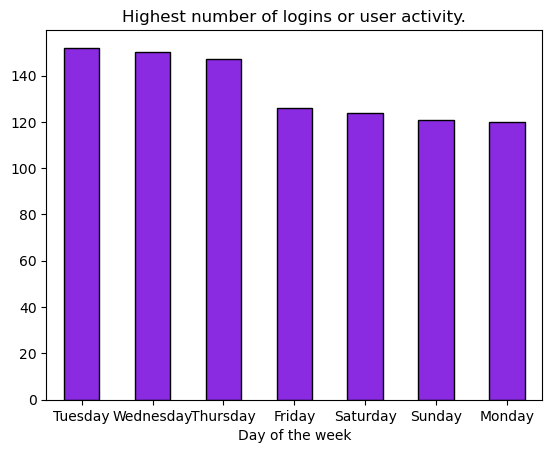

In [45]:
daily_activity['Day'].value_counts().plot(kind='bar',edgecolor='black',color='blueviolet')
plt.title('Highest number of logins or user activity.')
plt.xticks(rotation=0)
plt.xlabel('Day of the week')
plt.show()

#### The bar graph highlights that Tuesday has the highest number of logins, while Monday has the lowest. This pattern may be attributed to the start of the workweek, where users are likely more engaged in work-related activities.

## Activity level of users

In [46]:
minutes_data = daily_activity[['VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes']].copy()

In [47]:
minutes_data.index

RangeIndex(start=0, stop=940, step=1)

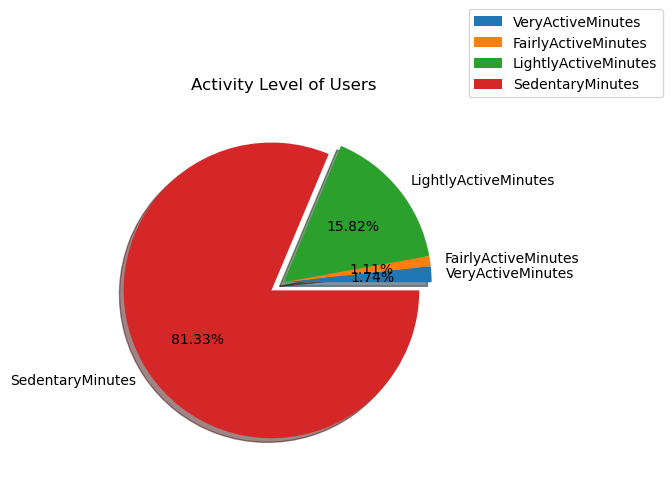

In [48]:
minutes_data.sum().plot(kind='pie',autopct='%0.2f%%',explode = (0, 0, 0, 0.1),shadow=True)
plt.title('Activity Level of Users')
plt.legend(loc=(1,1))
plt.ylabel(None)
plt.show()

#### The pie chart illustrates the distribution of activity levels among users. It reveals that a majority, specifically 81.33%, of the time, users are in a sedentary state. Additionally, 15.82% of the time, users are engaged in light activity, while 1.11% of the time they are moderately active and 1.74% of the time they are highly active.

#### - This bar graph indicates that users are sedentary for most of the time ie; being inactive. A sedentary lifestyle can have negative implications on one's overall health. It could lead to diseases such as diabetes,obesity. The sedentary lifestyle can be caused due to:-

- 1.Desk Jobs: Many jobs today involve long hours of sitting at a desk or in front of a computer, which can contribute to a sedentary lifestyle.

- 2.Lack of Physical Activity: Lack of regular physical activity can lead to a sedentary lifestyle. This could be due to factors such as a busy schedule, lack of access to exercise facilities, or a lack of interest in physical activities.

- 3.Technology and Screen Time: The widespread use of technology, including smartphones, computers, and televisions, has increased sedentary behavior. Spending excessive time on screens can discourage physical activity and promote sedentary habits

## Most active time of the day

In [79]:
active_day = pd.pivot_table(data=hourly_merged,index='Hour',values=['StepTotal'],aggfunc='mean')

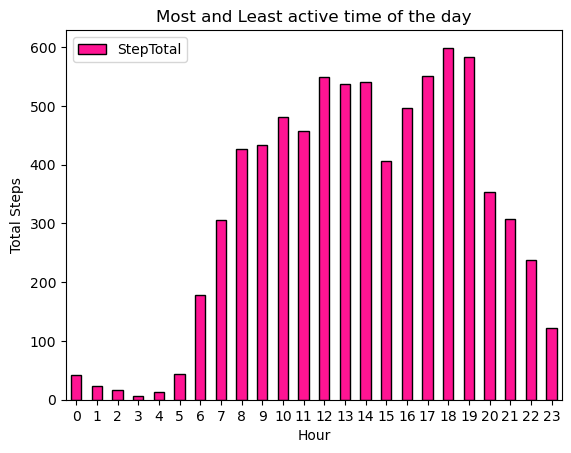

In [80]:
active_day.plot(kind='bar',edgecolor='black',color='deeppink')
plt.title('Most and Least active time of the day')
plt.ylabel('Total Steps')
plt.xticks(rotation=0)
plt.show()

### The bar graph illustrates that the period between 5pm and 7pm exhibits the highest user activity, resulting in the highest calorie expenditure during this time frame.

# Understanding the correlation

### For this analysis we will try to understand the correlation between TotalSteps ,TotalDistance,Calories, TotalMinutesAsleep and Total Minutes

In [50]:
data_corr = data[[ 'TotalSteps', 'TotalDistance','Calories','TotalMinutesAsleep']].copy()
data_corr

,TotalSteps,TotalDistance,Calories,TotalMinutesAsleep
0,13162,8.500000,1985,327.0
1,13162,8.500000,1985,384.0
2,13162,8.500000,1985,412.0
3,13162,8.500000,1985,340.0
4,13162,8.500000,1985,700.0
...,...,...,...,...
12570,10686,8.110000,2847,NaN
12571,20226,18.250000,3710,NaN
12572,10733,8.150000,2832,NaN
12573,21420,19.559999,3832,NaN


In [51]:
data_corr.corr()

,TotalSteps,TotalDistance,Calories,TotalMinutesAsleep
TotalSteps,1.000000,0.984289,0.451457,-0.099728
TotalDistance,0.984289,1.000000,0.553915,-0.097274
Calories,0.451457,0.553915,1.000000,0.020772
TotalMinutesAsleep,-0.099728,-0.097274,0.020772,1.000000


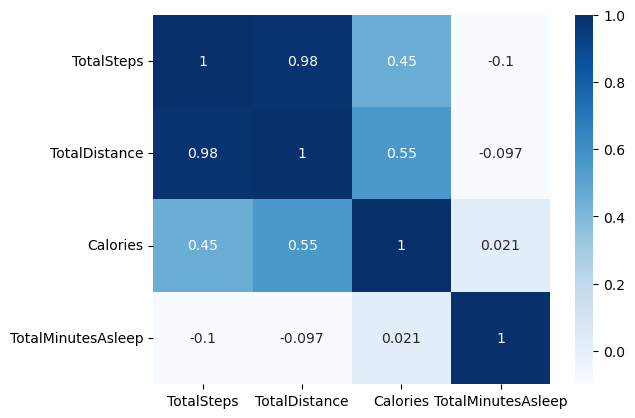

In [83]:
sns.heatmap(data_corr.corr(),annot=True,cmap="Blues")
plt.show()

### The heatmap analysis indicates a strong correlation between Total Steps and Total Distance. Additionally, there is a moderate correlation observed between Calories and Total Distance

### Total Steps vs Total Distance

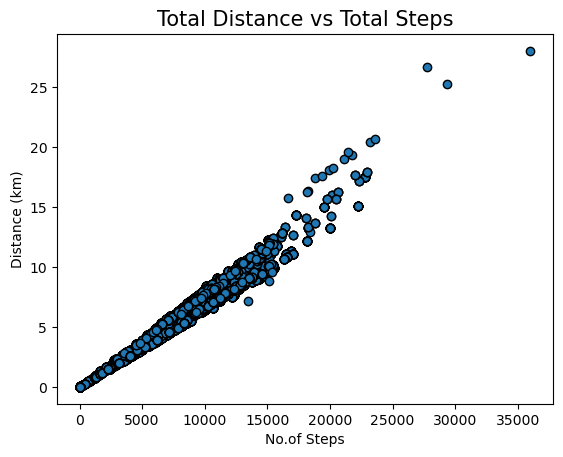

In [53]:
plt.scatter(x='TotalSteps',y='TotalDistance',data=data_corr,edgecolor='Black')
plt.title('Total Distance vs Total Steps',fontsize=15)
plt.ylabel('Distance (km)')
plt.xlabel('No.of Steps')
plt.show()

### This scatter plot displays a strong correlation between Total Distance and No.of steps covered, indicating that an increase in number of steps corresponds to greater distance travelled.

###  Total Distance vs Calories Burned

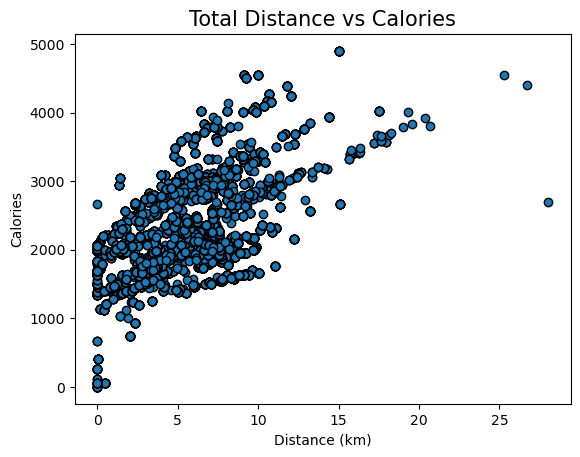

In [54]:
plt.scatter(x='TotalDistance',y='Calories',data=data_corr,edgecolor='Black')
plt.title('Total Distance vs Calories',fontsize=15)
plt.ylabel('Calories')
plt.xlabel('Distance (km)')
plt.show()

### Total distance and calories have a moderate correlation and from the scatter plot we can assume that more calories are burned when more distance is covered.

###  Total Steps vs Total Minutes Asleep

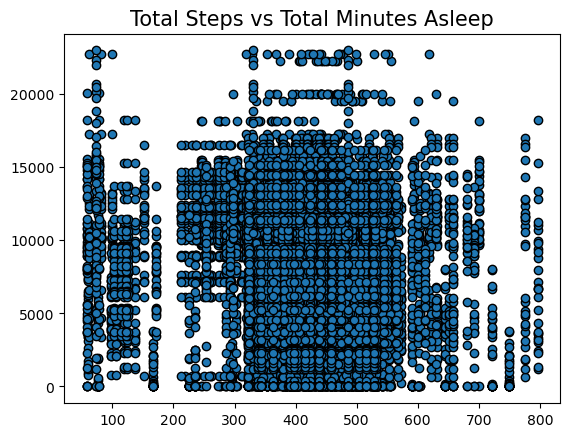

In [55]:
plt.scatter(x='TotalMinutesAsleep',y='TotalSteps',data=data_corr,edgecolor='Black')
plt.title('Total Steps vs Total Minutes Asleep',fontsize=15)
plt.show()

#### Generally a higher step count is often associated with better sleep because it suggests that a person had an active day and would likely feel more fatigued, making it easier for them to sleep. But the scatter plot doesn't show so.
This could be due to various factors such as :-
1. Timing of exercise :- If you walk too late it could perhaps interfere with your sleep as physical activity increases body temprature while sleeping reduces body temprature
2. Sleeping Pattern :- Sleeping patterns can vary among individuals, and some people may not maintain a regular sleep schedule, which can result in inadequate sleep.
3. Another potential factor could be attributed to insufficient data or the need for additional data collection.

# VI. Act

## Key Findings

- The average number of steps taken is 7,638, which is approximately equivalent to a distance of 5.5 kilometers
- On average, users burn around 2,304 calories. 
- Users are active for an average of 227 minutes, while they remain sedentary for approximately 991 minutes.
- Users spend an average of 419 minutes asleep, with approximately 458 minutes spent in bed.
- Thursday is the day calories are burnt the most while the least calories were burnt on Friday
- Sunday and Saturday exhibit higher step counts compared to the other days, suggesting that this data likely represents the working class population. The step counts on the remaining days are relatively lower.
- Thursday is the day with the highest sleep duration.
- Tuesday has the highest number of logins, while Monday has the lowest. This pattern may be attributed to the start of the workweek, where users are likely more engaged in work-related activities.
-  81.33%, of the time, users are in a sedentary state. Additionally, 15.82% of the time, users are engaged in light activity, while 1.11% of the time they are moderately active and 1.74% of the time they are highly active.
- 5pm - 7pm exhibits the highest user activity, resulting in the highest calorie expenditure during this time frame.
-  A strong correlation between Total Distance and No.of steps covered, indicating that an increase in number of steps corresponds to greater distance travelled.
- Total distance and calories have a moderate correlation so we can assume that more calories are burned when more distance is covered.


# Recommendations

## 1.Custom messages to users 
From the data which was analyzed, users need to be more health concious and take the right steps to improve their health. The average steps travelled per day is only 7,638.The National Institute of Health states 10,000 steps/day is a reasonable target for healthy adults'. By providing personalized messages (notifications) with realtime tracking through visualizations, Bellabeat can make users aware of their health and motivate them.

## 2. Incorporating various features in regard to sleep.
Based on the analyzed data, it is evident that users should prioritize their sleep and be mindful of their sleep patterns.
The National Institute of Health states that **The optimal amount of sleep, for most people, should be within the age-appropriate sleep duration recommended range** ie; 7-9hrs of sleep. Bellabeat can implement various features such as:-
- **Sleep Reminders**:- The app can provide sleep reminders to users, sending them notifications a few hours before their desired bedtime to encourage them to prioritize sleep.
- **Integration with Smart Home Devices**: If users have smart home devices, the app can integrate with them to control lighting, temperature, and other environmental factors to create an optimal sleep environment.
- Bellabeat can include various relaxtion techniques such as meditation to reduce stress and promote better sleep quality


## 3. Social Community and Challenges
Bellabeat could introduce challenges where users can connect, share their progress, and participate in challenges with friends or other app users. This will instill friendly competition , boost motivation and engagment. Encourage users to share their experiences with Bellabeat products using branded hashtags to create a sense of community.

## 4. Workplace Partnerships 
Collaborate with employers or workplace wellness programs to promote products as part of an employee wellness initiative. Offer exclusive discounts or benefits to employees, organize wellness challenges, or provide on-site product demonstrations to gain exposure and attract new customers.

# References

- Dataset - https://www.kaggle.com/datasets/arashnic/fitbit
- Sleeping hours: what is the ideal number and how does age impact this? https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6267703/
- How many steps/day are enough? for adults - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3197470/